In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU device:',torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('No GPU avaialable, Using CPU')

torch.cuda.set_device(5)

GPU device: Tesla V100-SXM2-32GB


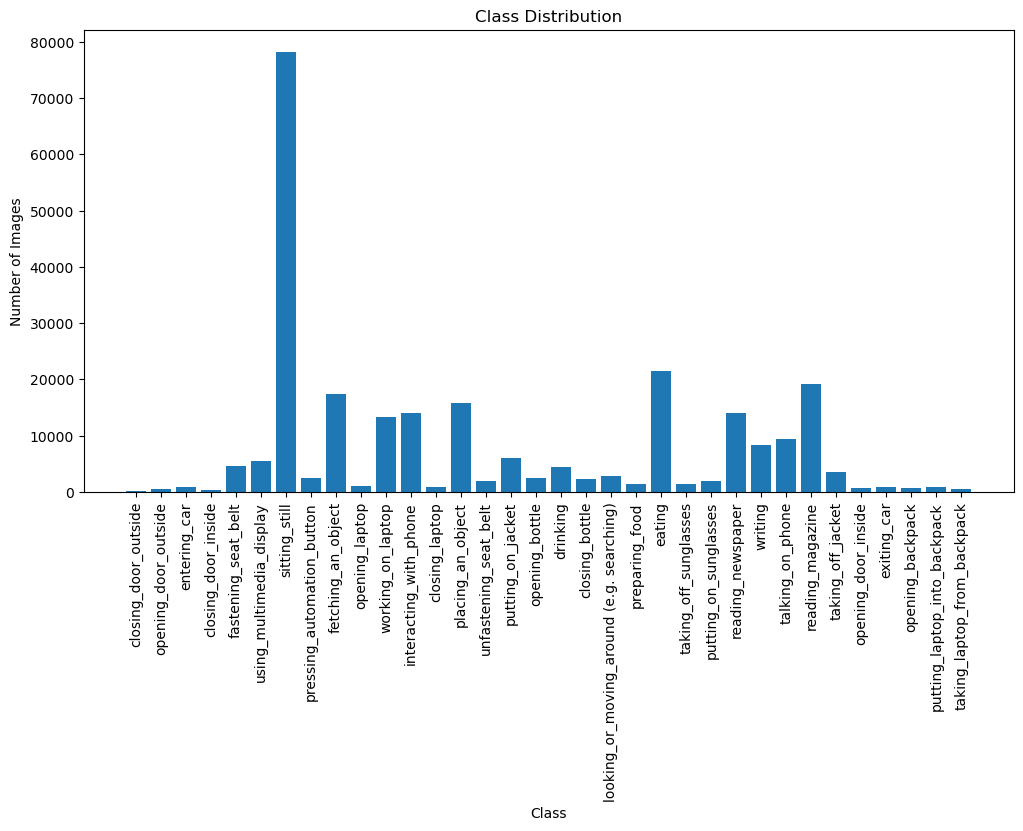

In [2]:
import os
import glob
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_dir = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/train'

# Get the list of class directories within the dataset
class_dirs = glob.glob(os.path.join(dataset_dir, '*'))

# Get the class labels
class_labels = [os.path.basename(class_dir) for class_dir in class_dirs]

# Count the number of images in each class
class_counts = []
for class_dir in class_dirs:
    images = glob.glob(os.path.join(class_dir, '*/*.png'))
    class_count = len(images)
    class_counts.append(class_count)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

Class information and ratios saved to /home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_train.csv


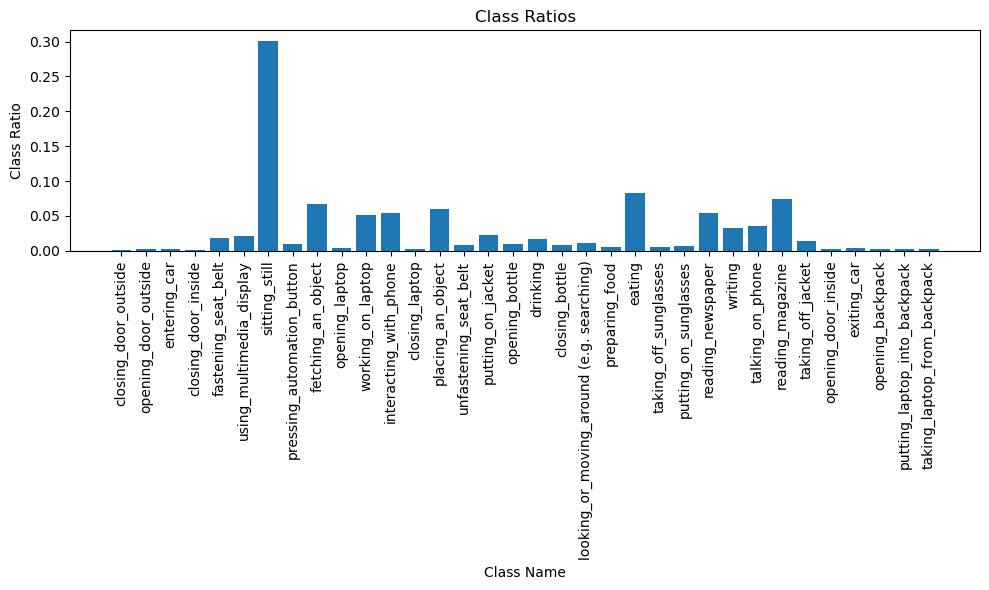

In [4]:
import os
import glob
import csv
import matplotlib.pyplot as plt

def calculate_class_ratios_and_plot(directory, output_csv_file):
    class_directories = glob.glob(os.path.join(directory, '*'))
    class_data = []  # List to store class information as dictionaries
    total_images = 0

    for class_directory in class_directories:
        class_name = os.path.basename(class_directory)
        image_files = glob.glob(os.path.join(class_directory, '*', '*.png'))

        num_images = len(image_files)
        # Appending a dictionary to the list so that we can append other key value pairs too
        class_data.append({'Class Name': class_name, 'Number of Images': num_images})
        total_images += num_images

    # Calculate class ratios
    for class_info in class_data:
        class_info['Class Ratio'] = class_info['Number of Images'] / total_images

    # Write class information and ratios to CSV
    with open(output_csv_file, mode='w', newline='') as csv_file:
        fieldnames = ['Info Type', 'Info']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        # Write dataset directory info
        writer.writerow({'Info Type': 'Dataset Directory', 'Info': directory})
        
        # Write output CSV file info
        writer.writerow({'Info Type': 'Output CSV File', 'Info': output_csv_file})

        writer.writerow({})  # Empty row for separation

        writer.writerow({'Info Type': 'Total Training Images', 'Info': total_images})

        writer.writerow({})  # Empty row for separation

        fieldnames = ['Class Name', 'Number of Images', 'Class Ratio']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        for class_info in class_data:
            writer.writerow(class_info)

    print(f"Class information and ratios saved to {output_csv_file}")

    # Plot class ratios
    plt.figure(figsize=(10, 6))
    plt.bar([info['Class Name'] for info in class_data], [info['Class Ratio'] for info in class_data])
    plt.xlabel('Class Name')
    plt.ylabel('Class Ratio')
    plt.title('Class Ratios')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

dataset_directory = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/train'
output_csv_file = '/home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_train.csv'
calculate_class_ratios_and_plot(dataset_directory, output_csv_file)


# For Test set Images

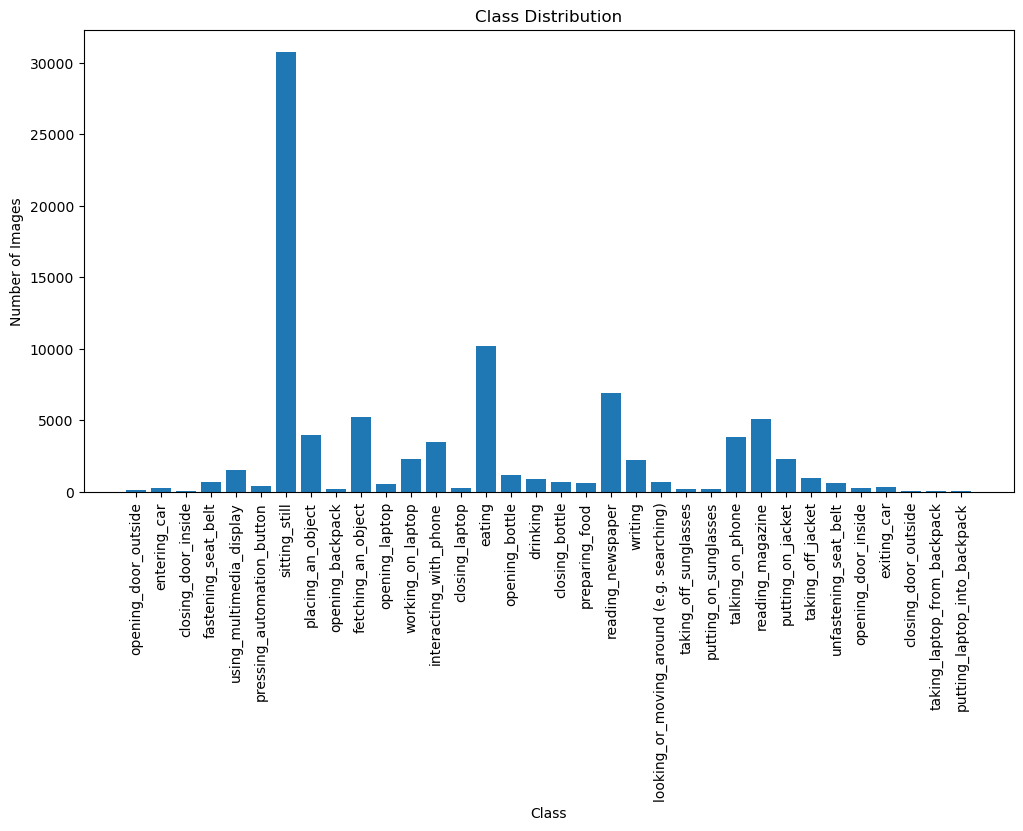

In [5]:
import os
import glob
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_dir = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/test'

# Get the list of class directories within the dataset
class_dirs = glob.glob(os.path.join(dataset_dir, '*'))

# Get the class labels
class_labels = [os.path.basename(class_dir) for class_dir in class_dirs]

# Count the number of images in each class
class_counts = []
for class_dir in class_dirs:
    images = glob.glob(os.path.join(class_dir, '*/*.png'))
    class_count = len(images)
    class_counts.append(class_count)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

Class information and ratios saved to /home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_test.csv


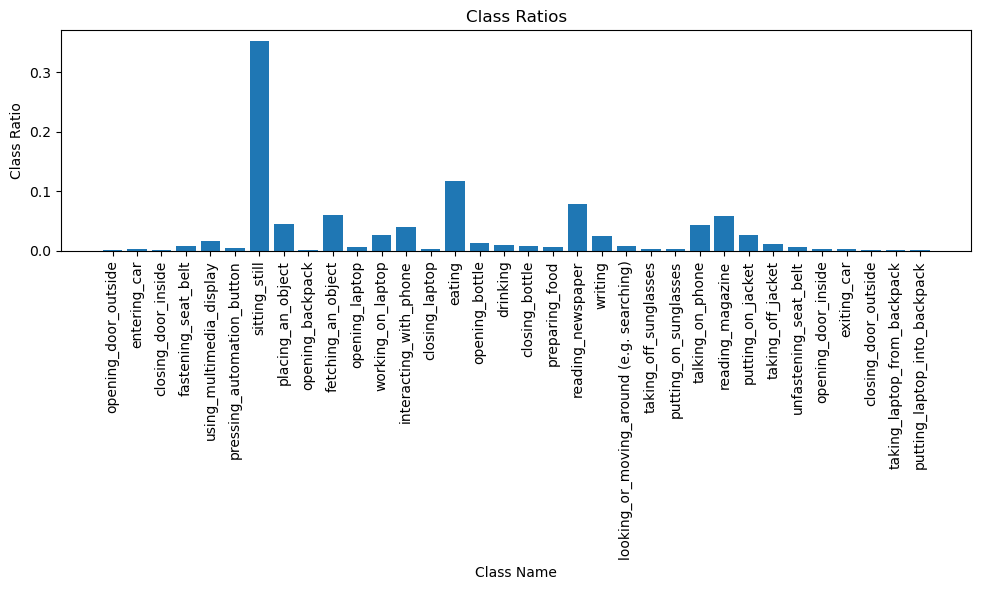

In [6]:
import os
import glob
import csv
import matplotlib.pyplot as plt

def calculate_class_ratios_and_plot(directory, output_csv_file):
    class_directories = glob.glob(os.path.join(directory, '*'))
    class_data = []  # List to store class information as dictionaries
    total_images = 0

    for class_directory in class_directories:
        class_name = os.path.basename(class_directory)
        image_files = glob.glob(os.path.join(class_directory, '*', '*.png'))

        num_images = len(image_files)
        # Appending a dictionary to the list so that we can append other key value pairs too
        class_data.append({'Class Name': class_name, 'Number of Images': num_images})
        total_images += num_images

    # Calculate class ratios
    for class_info in class_data:
        class_info['Class Ratio'] = class_info['Number of Images'] / total_images

    # Write class information and ratios to CSV
    with open(output_csv_file, mode='w', newline='') as csv_file:
        fieldnames = ['Info Type', 'Info']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        # Write dataset directory info
        writer.writerow({'Info Type': 'Dataset Directory', 'Info': directory})
        
        # Write output CSV file info
        writer.writerow({'Info Type': 'Output CSV File', 'Info': output_csv_file})

        writer.writerow({})  # Empty row for separation

        writer.writerow({'Info Type': 'Total Testing Images', 'Info': total_images})

        writer.writerow({})  # Empty row for separation

        fieldnames = ['Class Name', 'Number of Images', 'Class Ratio']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        for class_info in class_data:
            writer.writerow(class_info)

    print(f"Class information and ratios saved to {output_csv_file}")

    # Plot class ratios
    plt.figure(figsize=(10, 6))
    plt.bar([info['Class Name'] for info in class_data], [info['Class Ratio'] for info in class_data])
    plt.xlabel('Class Name')
    plt.ylabel('Class Ratio')
    plt.title('Class Ratios')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

dataset_directory = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/test'
output_csv_file = '/home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_test.csv'
calculate_class_ratios_and_plot(dataset_directory, output_csv_file)


# For Validation Images

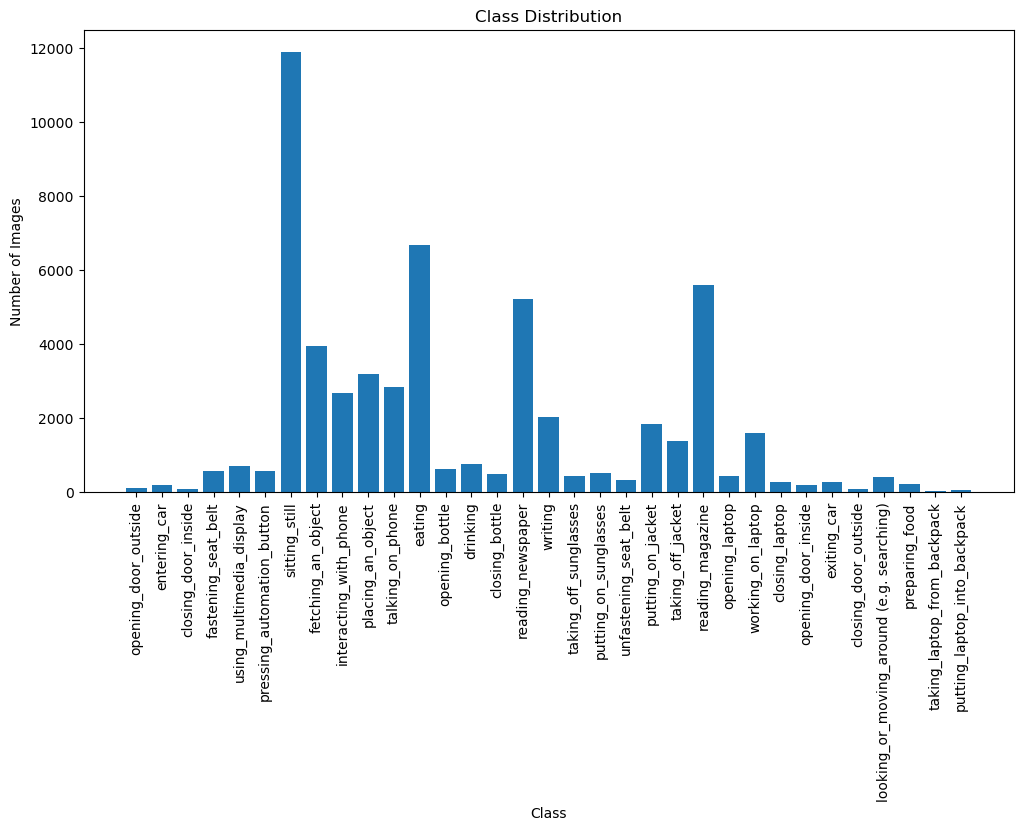

In [7]:
import os
import glob
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_dir = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/val'

# Get the list of class directories within the dataset
class_dirs = glob.glob(os.path.join(dataset_dir, '*'))

# Get the class labels
class_labels = [os.path.basename(class_dir) for class_dir in class_dirs]

# Count the number of images in each class
class_counts = []
for class_dir in class_dirs:
    images = glob.glob(os.path.join(class_dir, '*/*.png'))
    class_count = len(images)
    class_counts.append(class_count)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

Class information and ratios saved to /home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_val.csv


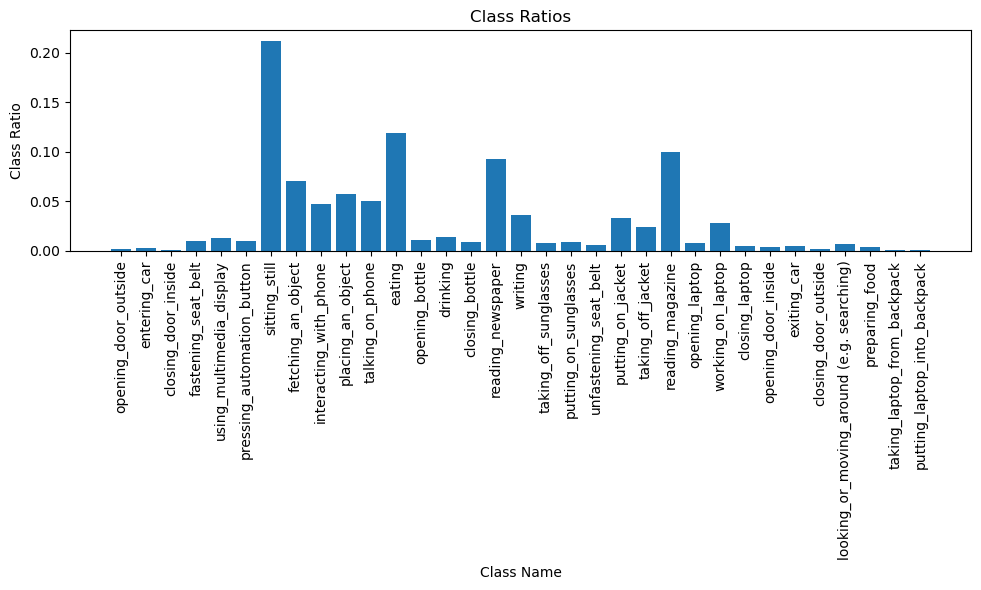

In [8]:
import os
import glob
import csv
import matplotlib.pyplot as plt

def calculate_class_ratios_and_plot(directory, output_csv_file):
    class_directories = glob.glob(os.path.join(directory, '*'))
    class_data = []  # List to store class information as dictionaries
    total_images = 0

    for class_directory in class_directories:
        class_name = os.path.basename(class_directory)
        image_files = glob.glob(os.path.join(class_directory, '*', '*.png'))

        num_images = len(image_files)
        # Appending a dictionary to the list so that we can append other key value pairs too
        class_data.append({'Class Name': class_name, 'Number of Images': num_images})
        total_images += num_images

    # Calculate class ratios
    for class_info in class_data:
        class_info['Class Ratio'] = class_info['Number of Images'] / total_images

    # Write class information and ratios to CSV
    with open(output_csv_file, mode='w', newline='') as csv_file:
        fieldnames = ['Info Type', 'Info']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        # Write dataset directory info
        writer.writerow({'Info Type': 'Dataset Directory', 'Info': directory})
        
        # Write output CSV file info
        writer.writerow({'Info Type': 'Output CSV File', 'Info': output_csv_file})

        writer.writerow({})  # Empty row for separation

        writer.writerow({'Info Type': 'Total Validation Images', 'Info': total_images})

        writer.writerow({})  # Empty row for separation

        fieldnames = ['Class Name', 'Number of Images', 'Class Ratio']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        for class_info in class_data:
            writer.writerow(class_info)

    print(f"Class information and ratios saved to {output_csv_file}")

    # Plot class ratios
    plt.figure(figsize=(10, 6))
    plt.bar([info['Class Name'] for info in class_data], [info['Class Ratio'] for info in class_data])
    plt.xlabel('Class Name')
    plt.ylabel('Class Ratio')
    plt.title('Class Ratios')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

dataset_directory = '/net/polaris/storage/deeplearning/sur_data/rgb_daa/split_0/val'
output_csv_file = '/home/sur06423/thesis/dino_v2/dinov2_experiments/dataset_eda/class_image_counts_and_ratios_split_0_val.csv'
calculate_class_ratios_and_plot(dataset_directory, output_csv_file)


In [10]:
# Data provided
data = [
    ("closing_door_outside", 226),
    ("opening_door_outside", 528),
    ("entering_car", 797),
    ("closing_door_inside", 328),
    ("fastening_seat_belt", 4664),
    ("using_multimedia_display", 5539),
    ("sitting_still", 78227),
    ("pressing_automation_button", 2430),
    ("fetching_an_object", 17479),
    ("opening_laptop", 1075),
    ("working_on_laptop", 13381),
    ("interacting_with_phone", 13984),
    ("closing_laptop", 862),
    ("placing_an_object", 15725),
    ("unfastening_seat_belt", 1994),
    ("putting_on_jacket", 5953),
    ("opening_bottle", 2500),
    ("drinking", 4476),
    ("closing_bottle", 2227),
    ("looking_or_moving_around (e.g. searching)", 2795),
    ("preparing_food", 1460),
    ("eating", 21508),
    ("taking_off_sunglasses", 1463),
    ("putting_on_sunglasses", 1959),
    ("reading_newspaper", 14042),
    ("writing", 8401),
    ("talking_on_phone", 9383),
    ("reading_magazine", 19249),
    ("taking_off_jacket", 3572),
    ("opening_door_inside", 684),
    ("exiting_car", 910),
    ("opening_backpack", 689),
    ("putting_laptop_into_backpack", 834),
    ("taking_laptop_from_backpack", 521),
]

# Initialize counters for each range
count_greater_than_20000 = 0
count_between_15000_and_20000 = 0
count_between_10000_and_15000 = 0
count_between_5000_and_10000 = 0
count_between_2500_and_5000 = 0
count_between_500_and_2500 = 0
count_between_50_and_500 = 0

# Iterate through the data and check the number of images for each class
for _, num_images in data:
    if num_images > 20000:
        count_greater_than_20000 += 1
    elif 15000 <= num_images <= 20000:
        count_between_15000_and_20000 += 1
    elif 10000 <= num_images < 15000:
        count_between_10000_and_15000 += 1
    elif 5000 <= num_images < 10000:
        count_between_5000_and_10000 += 1
    elif 2500 <= num_images < 5000:
        count_between_2500_and_5000 += 1
    elif 500 <= num_images < 2500:
        count_between_500_and_2500 += 1
    elif 50 <= num_images < 500:
        count_between_50_and_500 += 1


# Print the results
print("Classes with more than 20,000 images:", count_greater_than_20000)
print("Classes with 15,000 to 20,000 images:", count_between_15000_and_20000)
print("Classes with 10,000 to 15,000 images:", count_between_10000_and_15000)
print("Classes with 5,000 to 10,000 images:", count_between_5000_and_10000)
print("Classes with 2,500 to 5,000 images:", count_between_2500_and_5000)
print("Classes with 500 to 2,500 images:", count_between_500_and_2500)
print("Classes with 50 to 500 images:", count_between_50_and_500)


Classes with more than 20,000 images: 2
Classes with 15,000 to 20,000 images: 3
Classes with 10,000 to 15,000 images: 3
Classes with 5,000 to 10,000 images: 4
Classes with 2,500 to 5,000 images: 5
Classes with 500 to 2,500 images: 15
Classes with 50 to 500 images: 2
